# Libraries installed

In [ ]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Libraries used

In [ ]:
import os
import wget
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Download and load dataset

The following functions are used to allow users to add their own filepath or URL. Nevertheless, if you don't want to use them, in the next code cell you can find a preloaded file, ready to use.

In [ ]:
def download_file(url, filename):
    """
    Download a file from the given URL and save it with the specified filename.

    Parameters:
    - url (str): The URL from which to download the file.
    - filename (str): The name to use when saving the downloaded file.

    Returns:
    None

    Raises:
    - FileNotFoundError: If the file specified by 'filename' is not found after attempting to download.
    - Exception: If an unexpected error occurs during the download process.
    """
    if not(os.path.isfile(filename)):
        print("Downloading file...")

        wget.download(url, filename)
        print(f"Current path: {os.getcwd()}")
        print("Files:")
        print(os.listdir())


def read_file() -> pd.DataFrame:
    """
    Prompt the user for a file path or URL, download the file if it's a URL, and read it into a Pandas DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the data from the specified file.

    Raises:
    - pd.errors.ParserError: If there is an issue parsing the file (e.g., incorrect file format).
    - FileNotFoundError: If the specified file is not found.
    - Exception: If an unexpected error occurs during the file reading process.
    """
    while True:
        try:
            file_or_url = input("Enter the file path or URL: ")

            if file_or_url.startswith("http"):
                filename = file_or_url.split("/")[-1] + ".csv"
                download_file(file_or_url, filename)
                return pd.read_csv(filename)

            filename_lowercase = file_or_url.lower()

            if filename_lowercase.endswith('.csv'):
                return pd.read_csv(filename_lowercase)

            if filename_lowercase.endswith(('.xls', '.xlsx')):
                return pd.read_excel(filename_lowercase)

            if filename_lowercase.endswith('.json'):
                return pd.read_json(filename_lowercase)

            print("Unsupported file format. Please provide a CSV, Excel, or JSON file.")

        except pd.errors.ParserError:
            print("Error: Unable to parse the file. Please check the file format.")
        except FileNotFoundError:
            print("Error: File not found. Please enter a valid file path or URL.")
        except Exception as e:
            print(f"An error occurred: {e}")

# link_data:
# https://gist.githubusercontent.com/fgiorgia/01023ab74d741a12125fd725e5e8da2a/raw/e7a8dcaad69c103f2831fd967de09c61e805b7ff/sales_raw_data_redi

#df = read_file()
#print(df)


Here is the preloaded file

In [ ]:
__DATASET_URL__ = "https://gist.githubusercontent.com/fgiorgia/01023ab74d741a12125fd725e5e8da2a/raw/e7a8dcaad69c103f2831fd967de09c61e805b7ff/sales_raw_data_redi"

df = pd.read_csv(__DATASET_URL__)

print("\nHead:\n")
print(df.head())


Head:

         Date Product  Quantity  Price
0  2023-01-01   Apple        10   1.50
1  2023-01-01  Banana        15   0.75
2  2023-01-02   Apple         8   1.50
3  2023-01-02  Banana        20   0.75
4  2023-01-03   Apple        12   1.50


Add column index name and make column names lowercase

In [ ]:
df.index.names = ['id']
df.columns = df.columns.str.lower()

print("\nHead:\n")
print(df.head())


Head:

          date product  quantity  price
id                                     
0   2023-01-01   Apple        10   1.50
1   2023-01-01  Banana        15   0.75
2   2023-01-02   Apple         8   1.50
3   2023-01-02  Banana        20   0.75
4   2023-01-03   Apple        12   1.50


# Columns Description
**Complete attribute documentation:**

* **id**: order number
* **date**: sales date (YYYY-MM-DD)
* **product**: product name
* **quantity**: quantity sold
* **price**: product price

# Exploring data

In [ ]:
print("\nShape:")
print(df.shape)


Shape:
(20, 4)


Check the data types of each column and the number of non-null values

In [ ]:
print("\nInfo:\n")
print(df.info())


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      20 non-null     object 
 1   product   20 non-null     object 
 2   quantity  20 non-null     int64  
 3   price     20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes
None


## Proportion of missing data
We're interested in the proportion of missing values to assess the overall data quality and make informed decisions regarding data imputation and feature engineering.


In [ ]:
prop_miss_values = round(df.isna().mean() * 100, 2)

print("\nProportion of missing values:\n")
print(prop_miss_values)


Proportion of missing values:

date        0.0
product     0.0
quantity    0.0
price       0.0
dtype: float64


## Unique values

Check the number of unique values in each column

In [ ]:
print("\nUnique values:\n")
print(df.nunique())


Unique values:

date        10
product      2
quantity    18
price        2
dtype: int64


Checking unique values to ensure data quality and identify any anomalies or inconsistencies in the dataset.

In [ ]:
for col in df:
    if df[col].dtypes == 'category':
        continue
    unique_values = df[col].unique()
    unique_values.sort()
    print(f'{col}: {unique_values}\n')

date: ['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10']

product: ['Apple' 'Banana']

quantity: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25]

price: [0.75 1.5 ]



Drop rows and columns that are entirely NA, if any

In [ ]:
df.dropna(how='all')
df.dropna(axis=1, how='all')

,date,product,quantity,price
id,,,,
0,2023-01-01,Apple,10,1.50
1,2023-01-01,Banana,15,0.75
2,2023-01-02,Apple,8,1.50
3,2023-01-02,Banana,20,0.75
4,2023-01-03,Apple,12,1.50
5,2023-01-03,Banana,18,0.75
6,2023-01-04,Apple,15,1.50
7,2023-01-04,Banana,22,0.75
8,2023-01-05,Apple,7,1.50


In [ ]:
duplicates = df[df.duplicated(keep = False)]

print("\nDuplicates:\n")
print(duplicates)


Duplicates:

Empty DataFrame
Columns: [date, product, quantity, price]
Index: []


No duplicates

Change data types

In [ ]:
df['date'] = pd.to_datetime(df['date'])

print("\nTypes:\n")
print(df.dtypes)

print("\nHead:\n")
print(df.head())


Types:

date        datetime64[ns]
product             object
quantity             int64
price              float64
dtype: object

Head:

         date product  quantity  price
id                                    
0  2023-01-01   Apple        10   1.50
1  2023-01-01  Banana        15   0.75
2  2023-01-02   Apple         8   1.50
3  2023-01-02  Banana        20   0.75
4  2023-01-03   Apple        12   1.50


Descriptive statistics for numerical columns


In [ ]:
print("\nDescribe:\n")
print(df.describe())


Describe:

                      date   quantity      price
count                   20  20.000000  20.000000
mean   2023-01-05 12:00:00  15.550000   1.125000
min    2023-01-01 00:00:00   7.000000   0.750000
25%    2023-01-03 00:00:00  11.750000   0.750000
50%    2023-01-05 12:00:00  15.500000   1.125000
75%    2023-01-08 00:00:00  19.250000   1.500000
max    2023-01-10 00:00:00  25.000000   1.500000
std                    NaN   5.145003   0.384742


**Basic Information**:

* The dataset spans a period from January 1, 2023, to January 10, 2023, with 20 data points.
* The mean quantity sold is approximately 15.55, and the mean price is $1.125.
* Sales quantity ranges from 7 to 25 units, and prices range from $0.75 to $1.5.

## Checking for outliers

In [ ]:
numerical_columns = list(df.loc[:,['quantity', 'price']])
categorical_columns = list(df.loc[:,['product', 'date']])

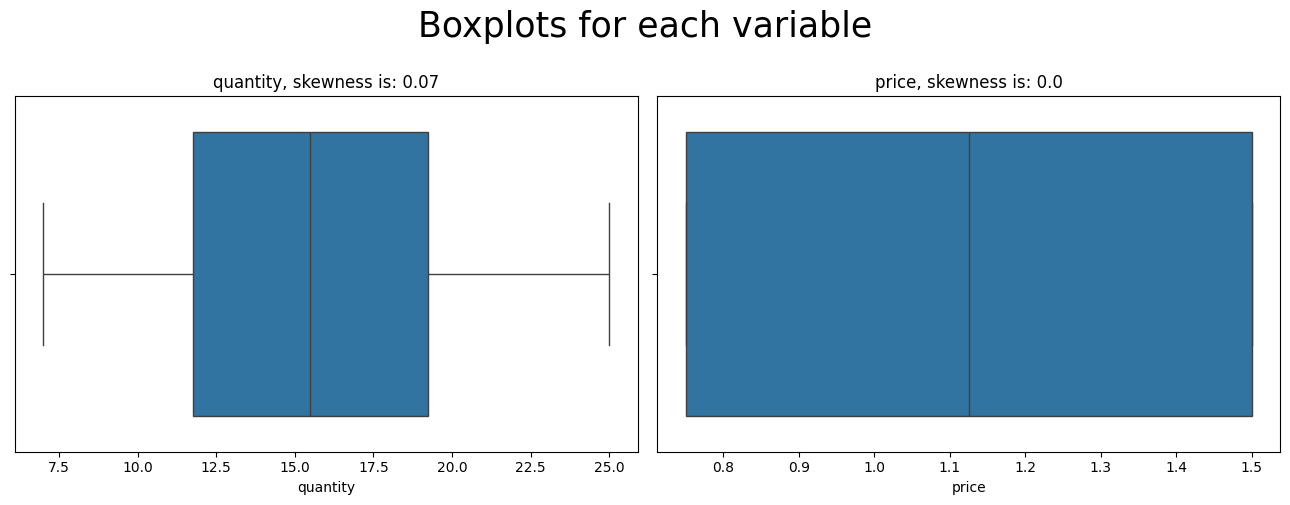

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=1, cols=2, suptitle='Boxplots for each variable')
plt.tight_layout()

No potential outliers

# Calculate Total Sales:
Add a new column to represent the total sales for each day in money.

In [ ]:
df['daily_product_sales'] = (df['quantity'] * df['price'])

print(df)

         date product  quantity  price  daily_product_sales
id                                                         
0  2023-01-01   Apple        10   1.50                15.00
1  2023-01-01  Banana        15   0.75                11.25
2  2023-01-02   Apple         8   1.50                12.00
3  2023-01-02  Banana        20   0.75                15.00
4  2023-01-03   Apple        12   1.50                18.00
5  2023-01-03  Banana        18   0.75                13.50
6  2023-01-04   Apple        15   1.50                22.50
7  2023-01-04  Banana        22   0.75                16.50
8  2023-01-05   Apple         7   1.50                10.50
9  2023-01-05  Banana        25   0.75                18.75
10 2023-01-06   Apple        11   1.50                16.50
11 2023-01-06  Banana        17   0.75                12.75
12 2023-01-07   Apple        14   1.50                21.00
13 2023-01-07  Banana        19   0.75                14.25
14 2023-01-08   Apple         9   1.50  

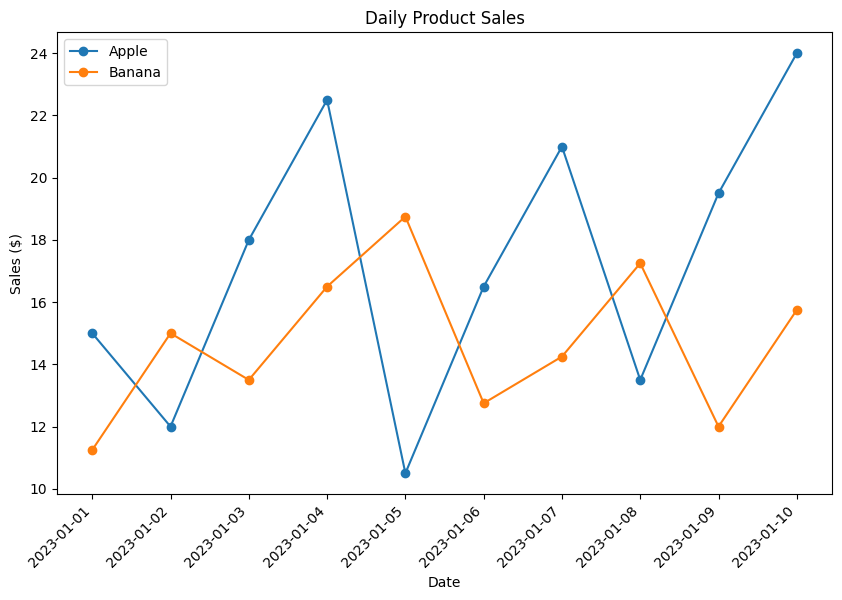

In [ ]:
plt.figure(figsize = (10, 6))
for product, data in df.groupby('product'):
    plt.plot(data['date'], data['daily_product_sales'], label = product, marker = 'o')

plt.xticks(df['date'].dt.date.unique(), rotation = 45, ha = 'right')
plt.title('Daily Product Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

Daily product sales alternate peaks of bananas and apples.

# Sales Performance by Product

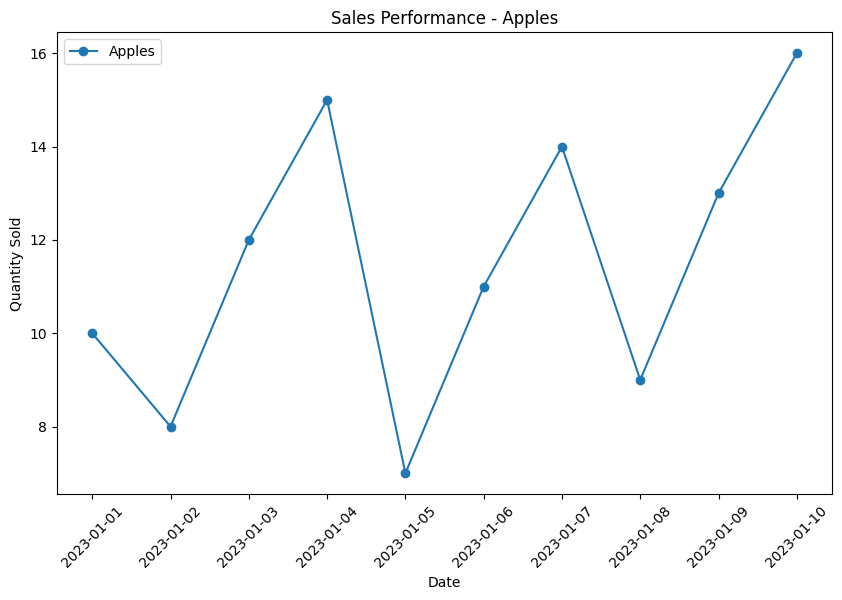

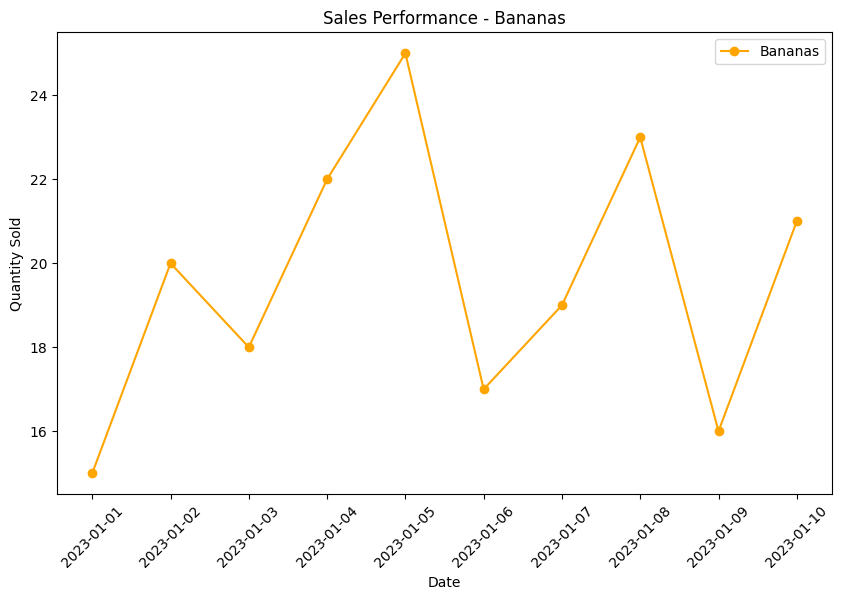

In [ ]:
# Separate data for apples and bananas
apples_data = df[df['product'] == 'Apple']
bananas_data = df[df['product'] == 'Banana']

# Apples
plt.figure(figsize=(10, 6))
plt.plot(apples_data['date'], apples_data['quantity'], label='Apples', marker='o')
plt.title('Sales Performance - Apples')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Bananas
plt.figure(figsize=(10, 6))
plt.plot(bananas_data['date'], bananas_data['quantity'], label='Bananas', marker='o', color='orange')
plt.title('Sales Performance - Bananas')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Revenue for each product

In [ ]:
df_copy = df.copy()

df_copy['revenue'] = df_copy['quantity'] * df_copy['price']

product_sales = df_copy.groupby('product').agg({'quantity': 'sum', 'revenue': 'sum'})

print("Total quantity sold and revenue for each product:")
print(product_sales)

Total quantity sold and revenue for each product:
         quantity  revenue
product                   
Apple         115    172.5
Banana        196    147.0


# Correlation

                             date  quantity         price  \
date                 1.000000e+00  0.189187 -1.089664e-14   
quantity             1.891874e-01  1.000000 -8.076210e-01   
price               -1.089664e-14 -0.807621  1.000000e+00   
daily_product_sales  3.268397e-01  0.243568  3.469388e-01   
product_Banana       1.095541e-14  0.807621 -1.000000e+00   

                     daily_product_sales  product_Banana  
date                            0.326840    1.095541e-14  
quantity                        0.243568    8.076210e-01  
price                           0.346939   -1.000000e+00  
daily_product_sales             1.000000   -3.469388e-01  
product_Banana                 -0.346939    1.000000e+00  


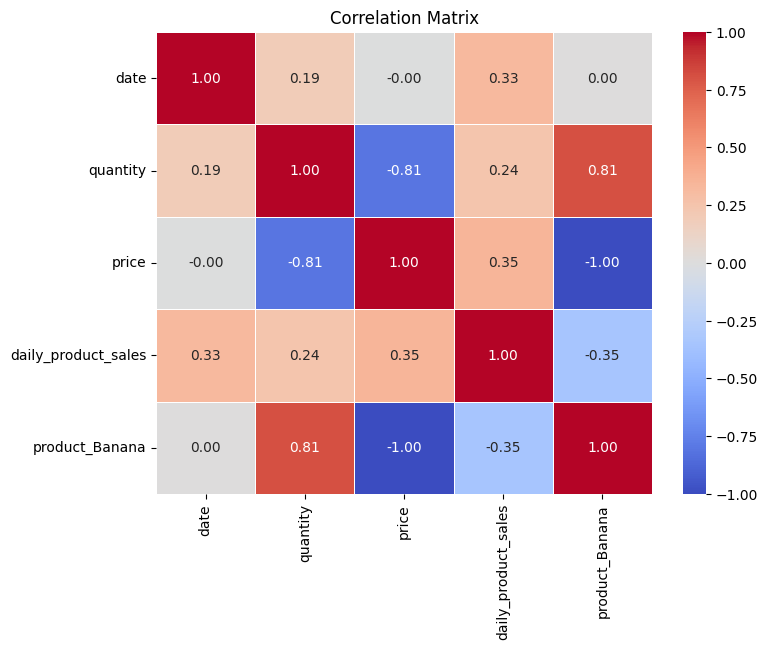

In [ ]:
df_copy = df.copy()

# One-hot encode the 'product' column
df_copy = pd.get_dummies(df_copy, columns=['product'], drop_first=True)

correlation_matrix = df_copy.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### Correlation results

**Bananas -> Quantity (High Positive Correlation)**:
* The high positive correlation between 'Bananas' and 'quantity' indicates that there is a strong association between the quantity of bananas sold and the total quantity sold. This suggests that when more items are sold in total, a significant portion of those sales comprises bananas.

**Apples -> Daily Sales (Moderate Positive Correlation)**:
* The moderate positive correlation between 'Apples' and 'daily_product_sales' implies that there is a moderate association between the daily total sales and the quantity of apples sold. This suggests that the sales of apples contribute reasonably to the overall daily earnings, likely influenced by the fact that apples have a higher price.

**Daily Sales -> Quantity (Low Positive Correlation)**:
* The low positive correlation between `daily_product_sales` and `quantity` suggests a weak association between the total daily sales and the total quantity of products sold. This implies that the daily sales figure is not strongly influenced by the quantity sold.

**Daily Sales -> Price (Low Positive Correlation)**:
* Similarly, a low positive correlation between `daily_product_sales` and `price` indicates a weak association between the total daily sales and the prices of the products. This implies that the daily sales figure is weekly influenced by product price.

**Quantity High -> Low Price (High Negative Correlation)**:
* The high negative correlation between `quantity` and `price` suggests a strong association between selling a higher quantity of products and offering those products at a lower price. This could indicate a pricing strategy where larger quantities sold lead to reduced individual product prices.

**Overall correlation results**:
* Bananas have a low impact on daily sales, as we need to sell a large quantity of them in order to weekly increase daily sales. Apples on the other hand, have a bigger impact on daily sales, comparatively less of them have a bigger influence on daily sales than bananas. Overall, while increasing the total amount of product influences daily sales, having a higher proportion of apples than bananas in the sales has a comparatively better effect on earnings.

# Price Elasticity of Demand

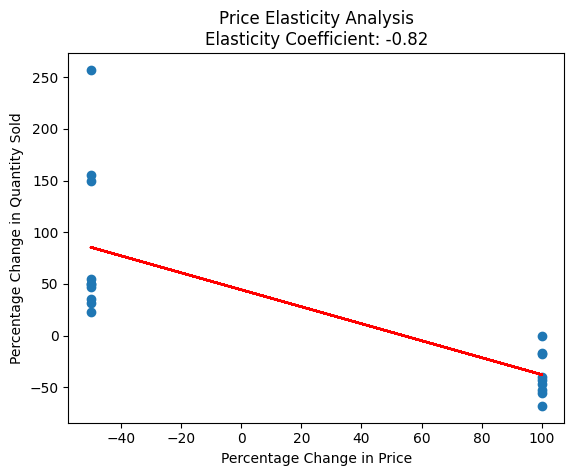

In [ ]:
price_elasticity_summary = df.copy()
price_elasticity_summary['pct_change_quantity'] = price_elasticity_summary['quantity'].pct_change() * 100
price_elasticity_summary['pct_change_price'] = price_elasticity_summary['price'].pct_change() * 100

# Drop NaN values introduced by percentage changes
price_elasticity_summary = price_elasticity_summary.dropna()

# Perform linear regression to estimate elasticity
X = sm.add_constant(price_elasticity_summary['pct_change_price'])
y = price_elasticity_summary['pct_change_quantity']

model = sm.OLS(y, X).fit()

# Extract elasticity coefficient
elasticity_coefficient = model.params['pct_change_price']

plt.scatter(price_elasticity_summary['pct_change_price'], price_elasticity_summary['pct_change_quantity'])
plt.plot(price_elasticity_summary['pct_change_price'], model.predict(X), color='red')
plt.title(f'Price Elasticity Analysis\nElasticity Coefficient: {elasticity_coefficient:.2f}')
plt.xlabel('Percentage Change in Price')
plt.ylabel('Percentage Change in Quantity Sold')
plt.show()


**Note**: As the price of apples and bananas never changes in our data, we make this analysis considering them just as a single product. Otherwise, we would expect each product to have price fluctuations in response to demand or other variables.

The absolute value of 0.82 suggests that the demand is relatively elastic. This means that a 1% change in price would result in approximately a 0.82% change in quantity demanded in the opposite direction. When demand is elastic, lowering the price leads to a greater percentage increase in quantity demanded than the percentage decrease in price. As a result, the total revenue (price multiplied by quantity) increases. Thus, a strategic reduction in the products' price would lead to an overall increase in total revenue.


**Further Analysis**:
* With more data, we may want to conduct further analyses to explore how other factors (e.g., promotions, seasonality) impact demand and whether there are specific segments with different elasticity levels.

# Daily total sales
Create a new dataframe for daily total sales

In [ ]:
daily_summary = df[['daily_product_sales', 'date']].groupby('date').sum()
daily_summary.rename(columns={'daily_product_sales': 'daily_total_sales'}, inplace=True)

print(daily_summary)

            daily_total_sales
date                         
2023-01-01              26.25
2023-01-02              27.00
2023-01-03              31.50
2023-01-04              39.00
2023-01-05              29.25
2023-01-06              29.25
2023-01-07              35.25
2023-01-08              30.75
2023-01-09              31.50
2023-01-10              39.75


# Calculate Total Quantity Sold:
Create a new column to represent the total quantity of products sold each day.

In [ ]:
daily_summary['total_quantity_sold'] = df['quantity'].groupby(df['date']).sum()

print(daily_summary)

            daily_total_sales  total_quantity_sold
date                                              
2023-01-01              26.25                   25
2023-01-02              27.00                   28
2023-01-03              31.50                   30
2023-01-04              39.00                   37
2023-01-05              29.25                   32
2023-01-06              29.25                   28
2023-01-07              35.25                   33
2023-01-08              30.75                   32
2023-01-09              31.50                   29
2023-01-10              39.75                   37


# Calculate Average Daily Sales:
Compute and display the average daily sales.

In [ ]:
daily_summary['average_daily_sales'] = df['daily_product_sales'].groupby(df['date']).mean()

print(daily_summary)

            daily_total_sales  total_quantity_sold  average_daily_sales
date                                                                   
2023-01-01              26.25                   25               13.125
2023-01-02              27.00                   28               13.500
2023-01-03              31.50                   30               15.750
2023-01-04              39.00                   37               19.500
2023-01-05              29.25                   32               14.625
2023-01-06              29.25                   28               14.625
2023-01-07              35.25                   33               17.625
2023-01-08              30.75                   32               15.375
2023-01-09              31.50                   29               15.750
2023-01-10              39.75                   37               19.875


## Simple Moving Average, SMA

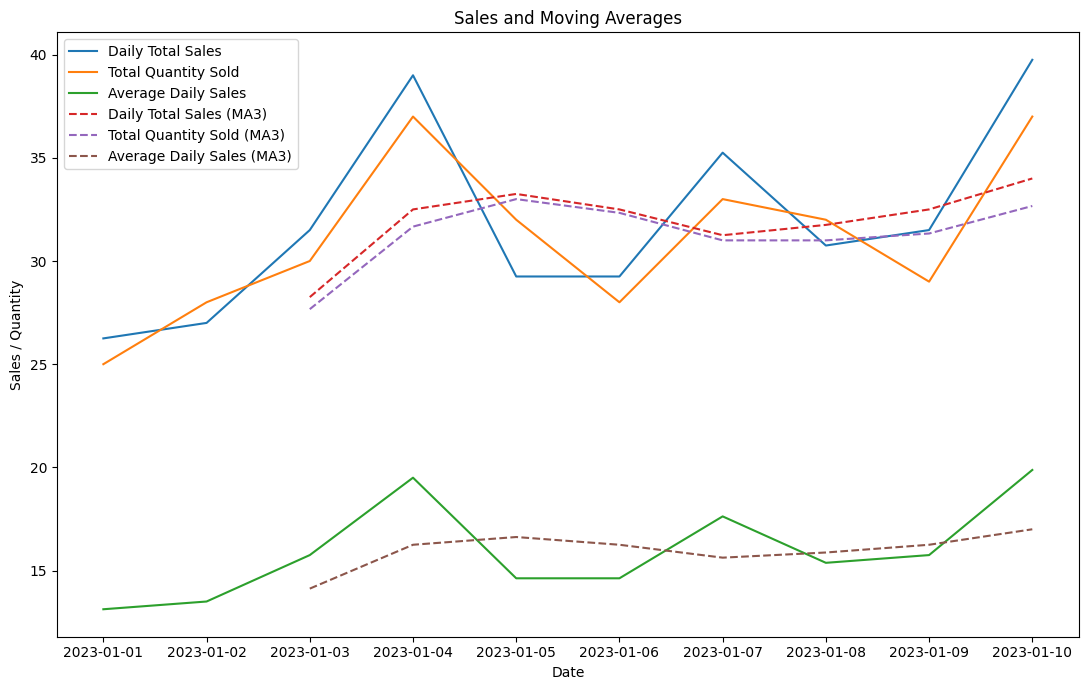

In [ ]:
WINDOW_SIZE = 3
daily_summary_ma = daily_summary.rolling(window = WINDOW_SIZE).mean()

daily_summary_ma.rename(
    columns={col_name : col_name + '_ma' for col_name in daily_summary_ma.columns},
    inplace=True
)

# Original data
plt.figure(figsize=(11, 7))
plt.plot(daily_summary.index, daily_summary['daily_total_sales'], label = 'Daily Total Sales')
plt.plot(daily_summary.index, daily_summary['total_quantity_sold'], label = 'Total Quantity Sold')
plt.plot(daily_summary.index, daily_summary['average_daily_sales'], label = 'Average Daily Sales')

# Moving averages
plt.plot(daily_summary.index, daily_summary_ma['daily_total_sales_ma'], label = f'Daily Total Sales (MA{WINDOW_SIZE})', linestyle='--')
plt.plot(daily_summary.index, daily_summary_ma['total_quantity_sold_ma'], label = f'Total Quantity Sold (MA{WINDOW_SIZE})', linestyle='--')
plt.plot(daily_summary.index, daily_summary_ma['average_daily_sales_ma'], label = f'Average Daily Sales (MA{WINDOW_SIZE})', linestyle='--')

plt.title('Sales and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales / Quantity')
plt.legend()
plt.tight_layout()
plt.show()


The ```window_size``` of 3 means that the moving average is calculated by taking the average of the current day and the two preceding days. This visualization allows you to observe trends and patterns in the sales data smoothed by the moving averages.

I chose ```window_size = 3``` based on:
* Data Frequency: If data is collected daily, a smaller window size may capture shorter-term fluctuations.
* Goals of Analysis: Given the small dataset, a smaller window size will provide more responsiveness to short-term changes. However, it might be sensitive to noise.
* Data Trends: We don't have long-term trends (a larger window size may help capture these trends more accurately)

### SMA Results:

* The initial upward trend could suggest positive momentum
* The slight decline in the middle of the SMA curve could indicate a slowdown, a temporary dip, or a correction in the trend
* The slight increase in the SMA toward the end suggests a potential recovery or renewed positive momentum in the later part of the data. It may indicate that the average values are once again on the rise.

*This is just a partial analysis, as we would need more data to have more significant results*

# Seasonal decomposition

Seasonal decomposition can aid in isolating trends and identifying seasonal patterns. While the current data may not be well-suited for this analysis, I have chosen to apply it for future data collected for this sales business.


**Model parameters**:

* **additive**: Assumes that the seasonal component is a constant addition across all time points. This means that the amplitude of the seasonal pattern does not depend on the level of the time series. It is appropriate when the seasonality is relatively constant regardless of the level of the series.
* **multiplicative**: Assumes that the seasonal component is a constant multiplication across all time points. This means that the amplitude of the seasonal pattern is proportional to the level of the time series. It is appropriate when the seasonality increases or decreases with the level of the series.


**Period parameter**:

* **period** specifies the number of observations per complete seasonal cycle. For example, if your data is daily but has a clear yearly seasonality, you might set period=365. If your data is monthly, you might set period=12 instead. The period choice should reflect the frequency of the seasonality you expect in your data.


**Summary**:
* If the amplitude of the seasonality seems to increase as the level of the time series increases, you might consider using a multiplicative model parameter.
* If the amplitude of the seasonality seems relatively constant across different levels of the time series, you might consider an additive model parameter.

* Setting ```period = 1``` indicates that the decomposition should not consider a repeating pattern or seasonality in the data. If your data has a seasonal component, you would typically set `period` to a value that reflects the length of the repeating pattern in your data (e.g., 7 for weekly, 12 for monthly, 365 for daily in a yearly cycle).

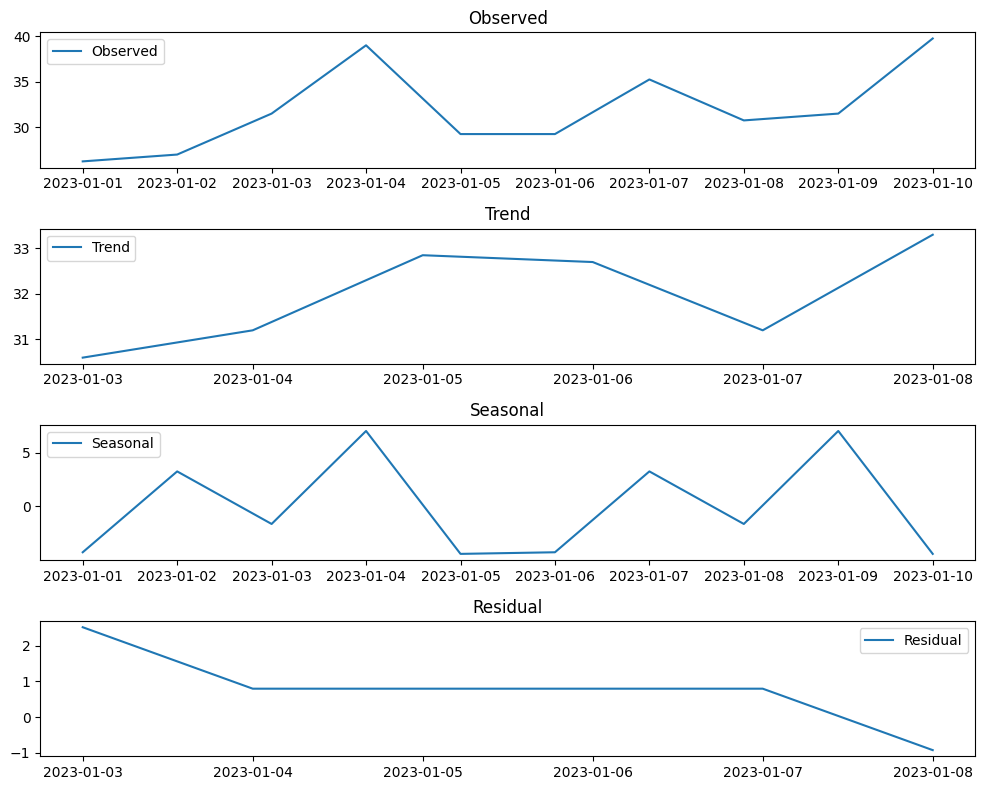

In [ ]:
result = seasonal_decompose(daily_summary['daily_total_sales'], model = 'additive', period = 5)  # Adjust 'period' based on the data's seasonality

plt.figure(figsize = (10, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label = 'Observed')
plt.legend()
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label = 'Trend')
plt.legend()
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label = 'Seasonal')
plt.legend()
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label = 'Residual')
plt.legend()
plt.title('Residual')

plt.tight_layout()
plt.show()


* **Trend**: The plot displays an initial upward trend, indicating an initial positive momentum in the data. It then flattens before having a short decline on the 7th day, and then recovering with another growth trend of renewed positive momentum.

* **Seasonal**: We can notice a characteristic 5 days seasonality constituted by two following peaks, the second higher than the first, followed by a short plateau.

* **Residual**: The residual plot is almost flat, but still non-negligible. It has a slight decline, plateauing on 1 for most of the plot, and ending with another decline. This means that the decomposition method, likely a naive or classical approach, did not leave much unexplained variability (residuals) in the data. This describes an analysis scenario where a basic decomposition was still able to separate noise from the linear trend.

With a small dataset, the challenges associated with time series analysis, especially decomposition, become more pronounced. Limited data points can make it challenging to identify meaningful trends and patterns, and traditional decomposition methods might not perform optimally.

# Find Best and Worst Sales Days:
Identify the days with the highest and lowest total sales.

In [ ]:
best_sales_day = daily_summary.loc[daily_summary['daily_total_sales'].idxmax()]
worst_sales_day = daily_summary.loc[daily_summary['daily_total_sales'].idxmin()]

print(f"Best Sales Day:\n{best_sales_day}")
print(f"\nWorst Sales Day:\n{worst_sales_day}")

Best Sales Day:
daily_total_sales      39.750
total_quantity_sold    37.000
average_daily_sales    19.875
Name: 2023-01-10 00:00:00, dtype: float64

Worst Sales Day:
daily_total_sales      26.250
total_quantity_sold    25.000
average_daily_sales    13.125
Name: 2023-01-01 00:00:00, dtype: float64


**Best and Worst Sales Days**:

January 10, 2023, stands out as the best sales day with a total sales amount of $39.75, 37 units sold, and an average daily sales of $19.875.

January 1, 2023, is identified as the worst sales day with total sales of $26.25, 25 units sold, and an average daily sales of $13.125.

<Axes: title={'center': 'Daily Total Sales'}, xlabel='Date', ylabel='Total Sales'>

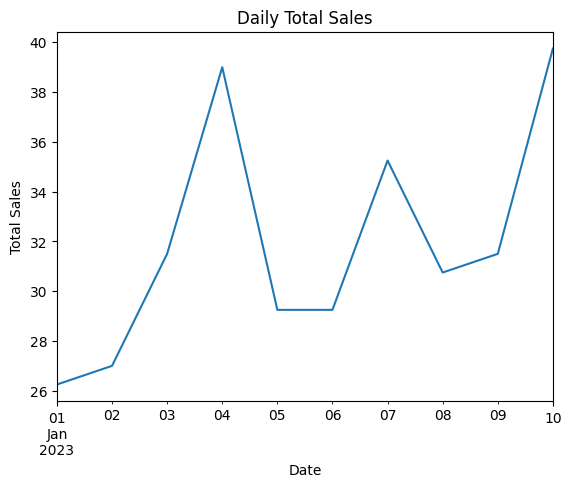

In [ ]:
daily_summary['daily_total_sales'].plot(kind = 'line', title = 'Daily Total Sales', xlabel = 'Date', ylabel = 'Total Sales')

# Group by Month:
Group the data by month and calculate the total sales for each month.

In [ ]:
monthly_summary = daily_summary.groupby(daily_summary.index.to_period("M"))['daily_total_sales'].sum().reset_index()

print(monthly_summary.head())

      date  daily_total_sales
0  2023-01              319.5


**Group by Month**:

The data has been grouped by month, showing the total sales for January 2023 as $319.5.

# Linear regression model

                            OLS Regression Results                            
Dep. Variable:      daily_total_sales   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     3.366
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.104
Time:                        23:09:53   Log-Likelihood:                -27.282
No. Observations:                  10   AIC:                             58.56
Df Residuals:                       8   BIC:                             59.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.1864      2.434  

/Users/giorgiafaedda/anaconda3/envs/redi/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


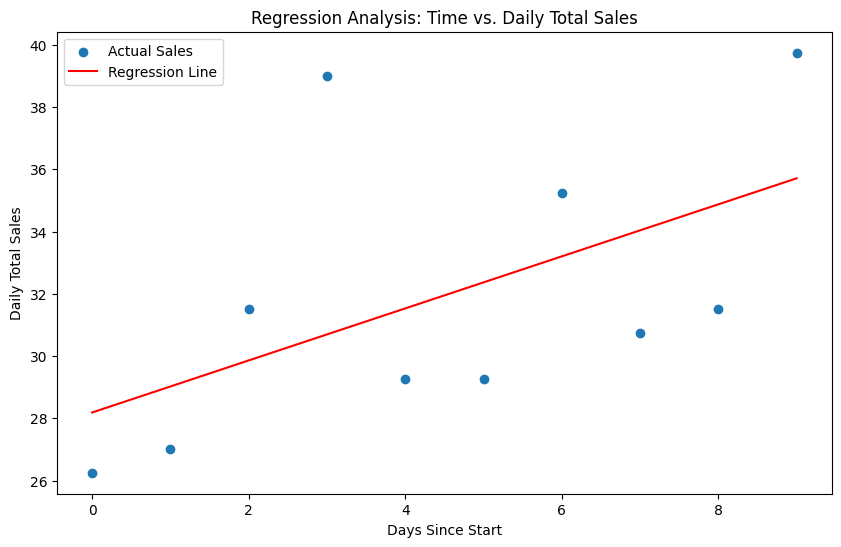

In [ ]:
daily_summary_copy = daily_summary.copy()
daily_summary_copy['days_since_start'] = (daily_summary.index - daily_summary.index.min()) / np.timedelta64(1, 'D')  # Days since the start of the dataset

X = sm.add_constant(daily_summary_copy['days_since_start'])  # Add a constant term for the intercept
y = daily_summary['daily_total_sales']

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(daily_summary_copy['days_since_start'], daily_summary['daily_total_sales'], label = 'Actual Sales')
plt.plot(daily_summary_copy['days_since_start'], model.predict(X), color = 'red', label = 'Regression Line')
plt.title('Regression Analysis: Time vs. Daily Total Sales')
plt.xlabel('Days Since Start')
plt.ylabel('Daily Total Sales')
plt.legend()
plt.show()


* **R-squared** is 0.296, indicating that approximately 29.6% of the variance in the dependent variable is explained by the independent variable. The adjusted R-squared (which adjusts for the number of predictors) is 0.208.

* **Prob (F-statistic)**: the p-value is greater than 0.05 and indicates that the model's overall fit is not statistically significant at a conventional significance level.

* The coefficient for "days_since_start" is 0.8364, indicating that, on average, the dependent variable is expected to increase by 0.8364 units for each one-unit increase in "days_since_start."

In summary, this linear regression model may not be a strong fit for the data based on the overall statistical significance (p-value of F-statistic) and the significance of individual coefficients.

# Conclusion

The correlation analysis shows how sales of bananas are not contributing much to daily sales, because of their lower price, so we need to sell many to have a low impact on daily sales. Apples sales, on the other hand, have a moderate impact on daily sales instead, so a higher proportion of apples over bananas is more beneficial than selling a higher quantity of product. Price elasticity of demand is nonexistent when considering individual products, due to their fixed price. Nevertheless, if considering the products as a whole, we can notice a 0.82 elasticity coefficient, suggesting that a price reduction could be beneficial to increase sales.

The seasonality decomposition also shows a 5-day cycle composed of a double-growing peak followed by a short plain, with an overall positive trend. More data would be needed to investigate this further. A similar trend emerges also in the SMA analysis with a 3-day time window, hinting at the reliability of the seasonality analysis (still within the boundaries of such a limited dataset). In line with this trend, the first day has the worst sales while the last is the highest.

The regression analysis has a positive coefficient, however, the result is not statistically significant, possibly due to the exceedingly small dataset.

Overall, the trend is positive and selling an increasingly higher amount of apples would be the best strategy to increase company earnings. Given the seasonality, we might consider focusing promotion (advertising, discounts, etc...) of products, and apples especially, to days that are going to have flatter sales.

## Thought Process and Challenges

I started verifying data consistency and basic statistics, and manipulating the data to obtain the required values. One of the tasks required aggregating data by month, so I was surprised, given that the dataset has only data pertaining to a single month. Nevertheless, I decided to perform the aggreagation considering it a living dataset, where new data can be added at timed intervals. After that, I plotted variables of interest and historical data, both aggregated or by product.

In order to make a deeper investigation and get hints on directions to explore, I performed a correlation analysis. This showed interesting connections between products, quantity and sales. This, together with the nature of the data, hinted a better focus on the sales data. So, I decided to perform a price elasticity analysis. Given that the fixed-price conditions of the product in the dataset did not allow for a thorough investigation, I performed it nevertheless, considering the products as a whole.

Afterwards, given the timed nature of data, I decided to analyse it from a time-series perspective using SMA analysis and seasonal decomposition. I was not sure about applying seasonality in such a short timeframe, but I noticed an interesting pattern on the 5-day cycle, so I decided to go for it. I also applied a linear regression between time and sales to test the significance of the trend results previously obtained.

Finally, I completed the conclusions summarising the previous sections and providing some company advice based on the results of the analyses.

### ChatGPT

As it pertains to ChatGPT, I used it as a virtual assistant throughout the whole process, both to discuss directions of research and to write code faster using the Copilot extension for VS Code as well. Nevertheless, I kept verifying both the provided information on the suggested analysis as well as the code suggestion, double-checking the relative documentation of the syntax and validity of the usage case. Thanks to this I learned new functions and packages and analytical methods. I also used ChatGPT as a draft-checker to improve the reports on the performed analysis, except for the conclusions and this paragraph, which I instead wrote entirely on my own.